In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica
# binary class
# svm is sensitive to scaler
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])
# the smaller than C, the more the margin violation
# loss function
svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [5]:
X, y = make_moons(n_samples=100, noise=0.15)

In [6]:
polynomial_svm_clf = Pipeline([('poly_features', PolynomialFeatures(degree=3)), 
                               ('scaler', StandardScaler()), ('svm_clf', LinearSVC(C=10, loss='hinge'))])
polynomial_svm_clf.fit(X, y)
# c =10, c is higher this time, which means less margin violation

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [7]:
from matplotlib import pyplot as plt


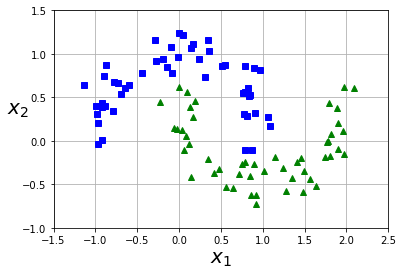

In [8]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") # X1 and X2
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
# y = 0 is blues
# y = 1 is green
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


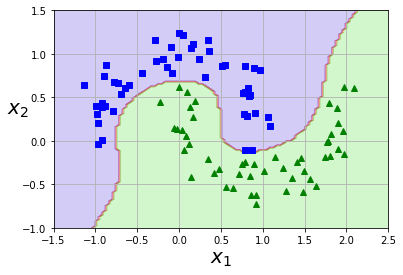

In [9]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100) # from -1.5 to 2.5
    x1s = np.linspace(axes[2], axes[3], 100) # from -1 to 1.5
    x0, x1 = np.meshgrid(x0s, x1s) # build coordination matrix
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
   # y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show() 
# visualize

In [10]:
axes=[-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100) # from -1.5 to 2.5
x1s = np.linspace(axes[2], axes[3], 100) # from -1 to 1.5
x0, x1 = np.meshgrid(x0s, x1s)

In [11]:
x0

array([[-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       ...,
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ]])

In [12]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
# kernel trick
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [13]:
rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)
# data set is small, so the runnung speed is fine

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [18]:
rbf_kernel_svm_clf.predict(X)

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [19]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)
# margin = 1.5
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [20]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = 'poly', degree = 2, C=100, epsilon=0.1)
# C = 100 , little regularization
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')